States:
There are 21 possible states for each docking station (0 to 20 scooters), resulting in a total of 441 possible states.
states can be represented as S = (s1,s2) with s representing the number of scooters at one parking lot. 

Actions:
At each time step, the scooter sharing company can choose to move up to 6 scooters from one docking station to another, or take no action. There are 13 different actions

Reward = 4*min(s1,D1) + 4 * min(S2, D2) - abs(a)

In [51]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [7]:
state_size = 21

In [32]:
actions = [-6, -5, -4, -3, -2, -1, 0 , 1,2,3,4,5,6]
action_index = [i for i in range(len(actions))]

In [5]:
def generate_poisson_distribution(mean):
    return np.random.poisson(mean) 

In [16]:
def choose_action(state, q_value):
    if np.random.binomial(1, EPSILON) == 1:
        return np.random.choice(action_index)
    else:
        values_ = q_value[state[0], state[1], :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

In [19]:
def step(state, action_index):
    action = actions[action_index]
#     print(action)
    return_station_1 = generate_poisson_distribution(4)
    return_station_2 = generate_poisson_distribution(3)
    
    borrow_station_1 = generate_poisson_distribution(4)
    borrow_station_2 = generate_poisson_distribution(5)
    
#     return_statation_1 = max(return_station_1,poisson_threshold)
    
#     return_statation_2 = max(return_station_2,poisson_threshold)
    
#     borrow_station_1 = max(borrow_station_1,poisson_threshold)
#     borrow_station_2 = max(borrow_station_2,poisson_threshold)

    new_state = [0,0]
    reward = 0
    reward1 = 0
    reward2 = 0
    
    if action < 0:
        action = max(state[0],abs(action))
    if action >0:
        action = max(state[1], abs(action))
    
    available_1 = state[0] + return_station_1 + action
    available_2 = state[1] + return_station_2 - action
    if available_1 > 20:
        available_1 = 20
    if available_2 > 20:
        available_2 = 20
    if borrow_station_1 > available_1:
        reward1 += available_1 * 4
        available_1 = 0
    else:
        reward1 += borrow_station_1 * 4
        available_1 -= borrow_station_1
    
    if borrow_station_2 > available_2:
        reward2 += available_2 * 4
        available_2 = 0
    else:
        reward2 += borrow_station_2 * 4
        available_2 -= borrow_station_2
    
    reward -= abs(action)
    
    reward = reward + reward1 + reward2
    
    new_state = [available_1, available_2]
    
    return new_state, reward
    

In [44]:
ALPHA = 0.01

In [37]:
def updateEpsilon(epsilon):
    epsilon = epsilon #play with this
    return epsilon

In [21]:
def q_learning(q_value, steps, initial_state = [0,0],step_size=ALPHA):
    state = initial_state
    rewards = 0.0
    for i in range(steps):
        action = choose_action(state, q_value)
        next_state, reward = step(state, action)
        rewards += reward
        # Q-Learning update
        q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + \
         step_size*(reward + GAMMA*np.max(q_value[next_state[0],next_state[1],:]) - \
                    q_value[state[0], state[1], action])#YOUR CODE HERE
        state = next_state
    return rewards, q_value

In [27]:
def baseline(steps,initial_state=[0,0]):
    state = initial_state
    rewards = 0.0
    for i in range(steps):
        action = 6
        next_state, reward = step(state, action)
        rewards += reward
        state = next_state
    return rewards

# Baseline

In [48]:
steps = 3000
for i in range(10):
    rewards = baseline(steps) 
    print(rewards)

81944.0
81520.0
81252.0
82400.0
81756.0
82304.0
81912.0
82276.0
81320.0
81244.0


# q-learning

In [50]:
q_q_learning = np.zeros((state_size, state_size, 13))
steps = 3000
GAMMA = 0.95
EPSILON = 0.2
episode_num = 6000
EPSILON_decay_rate = EPSILON/episode_num
reward_list = []
for i in tqdm(range(episode_num)):
    rewards, q_q_learning = q_learning(q_q_learning, steps) 
    EPSILON = updateEpsilon(EPSILON-EPSILON_decay_rate)
    reward_list.append(rewards)
            
EPSILON = 0
for i in range(10):
    rewards, q_q_learning = q_learning(q_q_learning, steps) 
    print(rewards)



100%|███████████████████████████████████████| 6000/6000 [22:38<00:00,  4.42it/s]


77582.0
79080.0
77656.0
79721.0
78324.0
78082.0
78301.0
78633.0
78745.0
78144.0


Text(0.5, 1.0, '3000 steps')

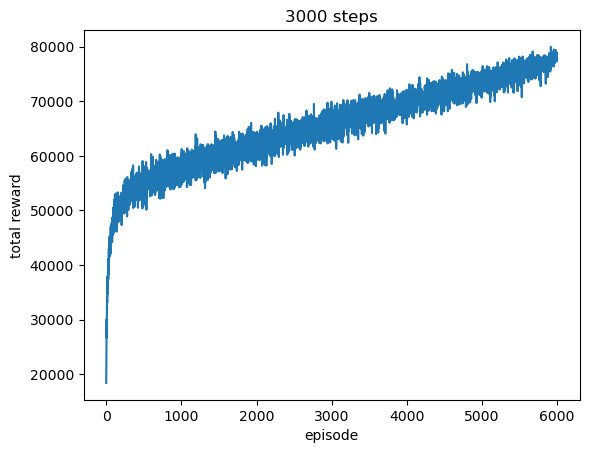

In [56]:
x = [i for i in range(len(reward_list))]
plt.plot(x,reward_list)
plt.xlabel("episode")
plt.ylabel("total reward")
plt.title("3000 steps")